In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import  seaborn as sns 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from collections import Counter

from sklearn.metrics import *  
import itertools
from sklearn.model_selection import*
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os


### Initial analysis of data (Notes from previous kernels):
> * **Data has lot more entries for Male compare to Female**
Given that the percentage of females at risk in the dataset exceeds that of males
Conducting a search to find whether this rate follows patterns of the disease among more general crowd, most of women at risk are of older age 

> * **Majority of people suffering from heart disease lies between age 40 to 65**
The age distribution of participants who are at risk  is approximately a  bimodal distribution peaking at 50’s and mid 60’s , while age range of people who are safe peak around 60’s
> * **Probability of getting heart disease starts reduce significiently after age of 60* for men for women the probability increases*
> * **People from age 37 to 59 has highest chance of getting heart disease by volume**



### Intuition from previous kernels:
> **logistic regression showed high accuracy with maximum 86%**
disadvatages: it encounters problems when there is no linear boundary can be established between two classes when adding more test observation orientation of the 2 classes in the feature space may differ
> * usage of PCA degraded original accuracy

>  **For KNN it showed accuracy 88.52%**

> * it can easily overfit the data tunning k parameter is a must , generalizing it to figure a model for the problem

> * problem with majority vote technique in the architecture of KNN , if the data is skewed towards a definite class the predictions tend to be of that class

> * the ranges of features are crucial in KNN , as the distance metric to calculate the nearest point can be affected by dataranges giving more weight to errors occuring to higher ranges features
also normalization in this light must be done accurately to increase accuracy , it can change the how points in feature space are close to each other , it can identifiy two points as close after normalization although they are close related to a feature that have a weak impact on output**

> * usage of PCA increased accuracy

>  **Random Forest showed high accuracy with maximum 86.52%**
Random forest can deal with the issue of overfitting in descision trees ,

> * For classification, the default value for m is advised to be ⌊√p⌋ and the minimum
    node size is one.
> * using full-grown trees seldom costs much, and results in one less tuning parameter.

> * When the number of variables is large, but the fraction of relevant variables
small, random forests are likely to perform poorly with small m. At each
split the chance can be small that the relevant variables will be selected.

>  **Gradient boosting showed high accuracy with maximum 84.44%**
gradient boosting technique is an effective one if based on weak learners 

>* it operates by training trees based on the error of the previous one , each is a weak learner of shallow depth 
can even amount to a stump (a 1-layer tree) , each week learner increase the bias , while the dependency of the trees on each other error increase variance , while random forests only decrease variance but it have an issue of having many hyperparameter to decide and can be prone to overfitting , regularization techniques or using only a fraction of features for fitting each tree is utilized to prevent this issue


>* it can be robust to irrelvant features ,as they are ignored from the start when the classifiers in earlier stages labeled it as erronus feature 

> * When the number of variables is large, but the fraction of relevant variables
small, random forests are likely to perform poorly with small m. At each
split the chance can be small that the relevant variables will be selected.


> **Both Gradient boosting and it's variation and random forest measure the importance of features in prediction of output :**

> * For boosting the feature importance is figured out related to how much the split of a specific feature decreses the gini-index

> * the oob samples are passed down the tree, and the prediction accuracy is recorded. Then the values for the
 jth variable are randomly permuted in the oob samples, and the accuracy is again computed. The decrease in accuracy
 as a result of this permuting is averaged over all trees, and is used as a measure of the importance of variable j in the random forest.
 *OOb samples are samples that their prediction is deduced from trees that didn't include 
**Note :Boosting ignores some variables completely, while the random forest does not. The candidate split-variable selection increases the chance that any single variable gets included in a random forest, while no such selection occurs with boosting**



### Features from medical perspective 

Fasting blood sugar(FBS):Fasting blood sugar is an important feature for measuring diabetes.
Though it is not directly related to heart diseases, It is pointed out that people with diabetes have a higher epidemiological
estimate lifetime risk (LTR) of chronical heart disease

Serum cholestoral(chol) :People who have higher cholesterol in their blood (or hypercholesterolemia) are more likely to have
their blood vessels narrowed with more cholesterol (mostly LDL cholesterol) precipited, which is known as atherosclerosis.

Coronary heart disease, which is one of the most common heart diseases, comes from lack of blood supply for the heart because
of atherosclerosis of coronary arteries.


Resting electrocardiographic results (restecg):In ECG, all the three ST-T wave abnormality menstioned(T wave inversion; ST elevation; ST depression of greater than 0.05 mV) are possible signs of myo infarction.
T wave inversion is a sign of lacking blood in endocardium, while ST abnomality indicates there are some damage to the myocardium due to lack of blood for a relatively long period of time.

Resting blood pressure (trestbps)
The data seems to be systolic blood pressure.

In most countries, the normal blood pressure is around 120/80. The 2019 standard of high blood pressure (or hypertension) is over 130/80 in America.
If not controlled, continuous status of high blood pressure can result in congestive heart failure.
In most circumstances, people with high blood pressure also suffered from coronary heart diseases, as high blood pressure can contribute to atherosclerosis.

(thal) :A blood disorder called thalassemia from complete blood count and hemoglobin tests              

the slope of the peak exercise ST segment (slope) 

number of major vessels colored by fluorosopy (ca) : There are two major coronary arteries providing nutrition for the heart. The left one has 3 major branches, and the right one has 5 major branches.

Under fluorosopy, only arteries that have a stable blood transmission can be shown clearly.
Which means the less visible vessels, the worse the heart can receive adequate nutrient and oxygen, and the greater the possibility the patient will suffer a heart attack

maximum heart rate achieved(thalach)

chest pain type (cp)

Value 0: asymptomatic
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain

Having chest pain indicate having heart disease

In [2]:
df= pd.read_csv('heart.csv')
dataX=df.iloc[:,:-1]
datay=df.iloc[:,-1]
training_columns=dataX.columns

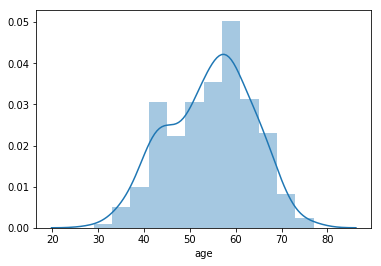

In [3]:
sns.distplot(df['age'])

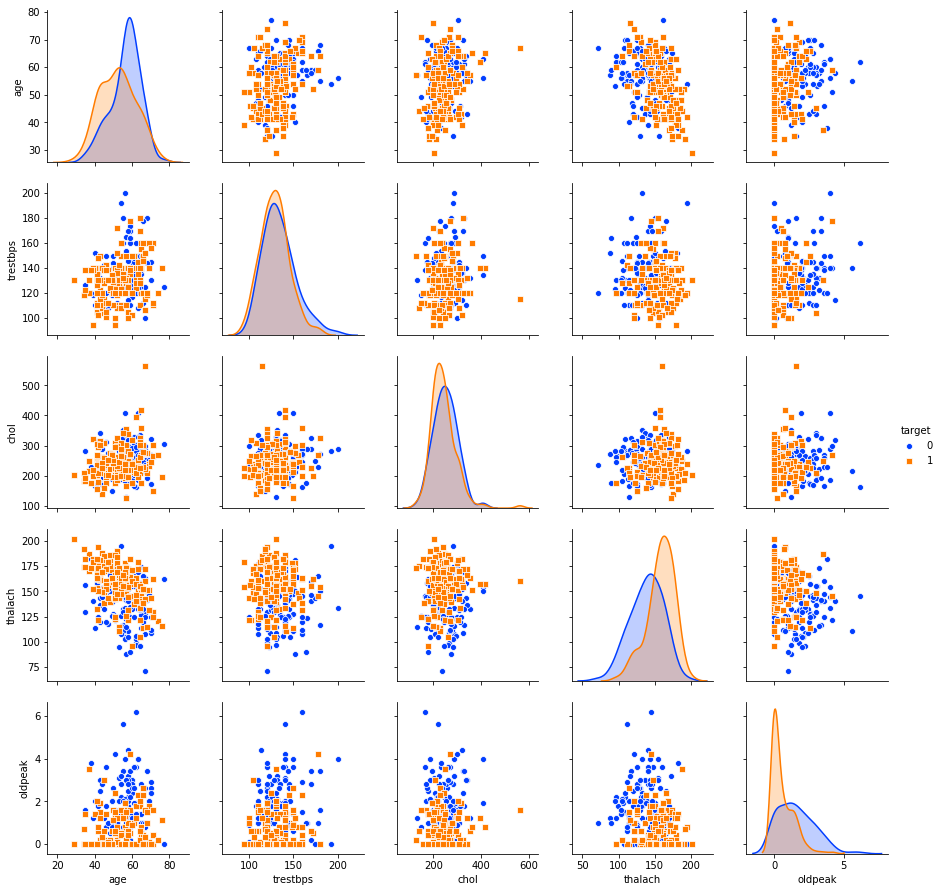

In [4]:
sns.pairplot(df, hue = 'target', markers=["o", "s"], vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], palette = sns.color_palette("bright", 10))

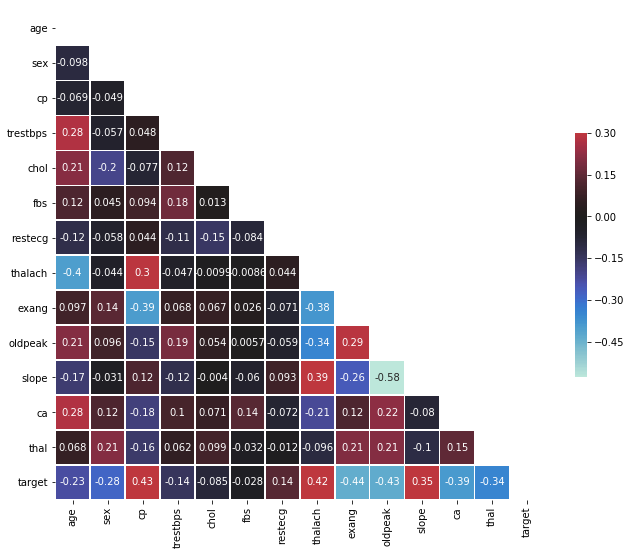

In [5]:
import seaborn as sns
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr,annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

(array([0, 1]), <a list of 2 Text xticklabel objects>)

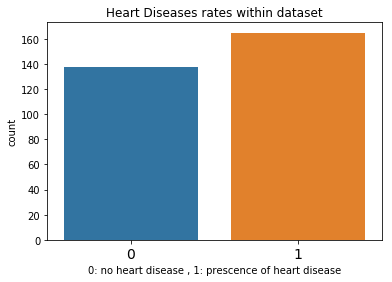

In [6]:
sns.countplot(x="target", data=df).set_title("Heart Diseases rates within dataset")

plt.xlabel('0: no heart disease , 1: prescence of heart disease')
plt.xticks(fontsize=14)


Text(0.5, 0, '0: no heart disease , 1: prescence of heart disease')

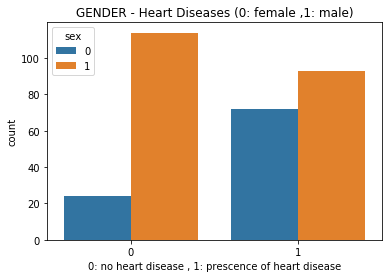

In [7]:
sns.countplot(x="target", data=df,hue = 'sex').set_title("GENDER - Heart Diseases (0: female ,1: male)")
plt.xlabel('0: no heart disease , 1: prescence of heart disease')


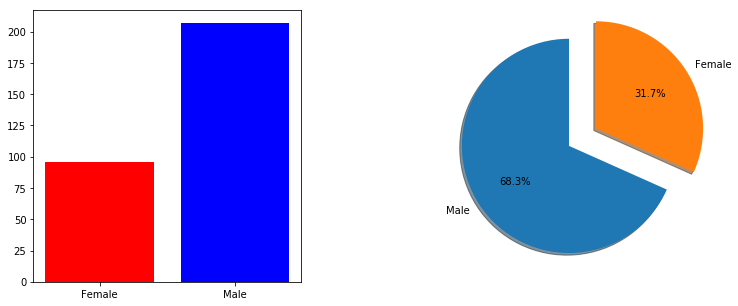

In [8]:
male_count = df.sex.value_counts().tolist()[0]
female_count = df.sex.value_counts().tolist()[1]

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.5)

ax1.bar(df.sex.unique(),df.sex.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(df.sex.unique())
ax1.set_xticklabels(('Male','Female'))

ax2.pie((male_count,female_count), labels = ('Male','Female'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0,0.3])

plt.show()

Text(0.5, 0, '0: female , 1: male')

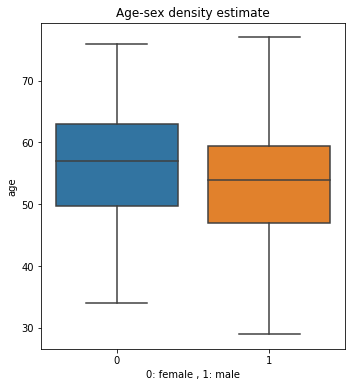

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot( df['sex'],df['age'])
plt.title('Age-sex density estimate')
plt.xlabel('0: female , 1: male')

In [10]:
heart_data=pd.read_csv('heart.csv')

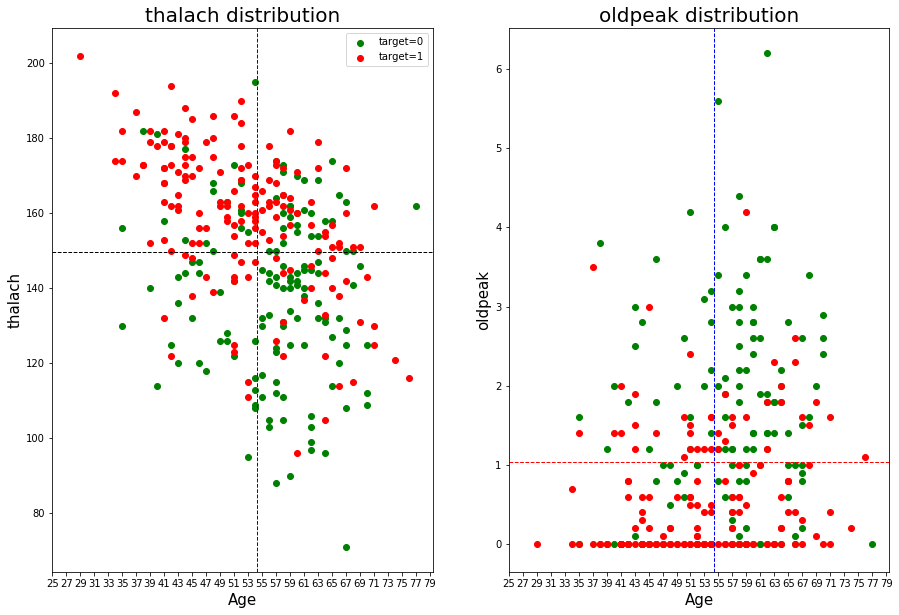

In [11]:
fig, axes = plt.subplots(1,2, figsize = (15,10))
plt.subplots_adjust(hspace = 0.5)

axes[0].scatter(heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0].scatter(heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0].set_title('thalach distribution',fontsize=20)
axes[0].set_xticks(range(25,80,2))
axes[0].set_xlabel('Age',fontsize=15)
axes[0].set_ylabel('thalach',fontsize=15)
axes[0].axhline(np.mean(heart_data['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0].legend()

axes[1].scatter(heart_data[heart_data['target']==0][['age','oldpeak']].sort_values(by = ['age']).age,heart_data[heart_data['target']==0][['age','oldpeak']].sort_values(by = ['age']).oldpeak, c = 'g',label = 'target=0')
axes[1].scatter(heart_data[heart_data['target']==1][['age','oldpeak']].sort_values(by = ['age']).age,heart_data[heart_data['target']==1][['age','oldpeak']].sort_values(by = ['age']).oldpeak, c = 'r',label = 'target=1')
axes[1].set_title('oldpeak distribution',fontsize=20)
axes[1].set_xticks(range(25,80,2))
axes[1].set_xlabel('Age',fontsize=15)
axes[1].set_ylabel('oldpeak',fontsize=15)
axes[1].axhline(np.mean(heart_data['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1].axvline(np.mean(heart_data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

plt.show()

In [12]:
"""
from scipy.cluster import hierarchy as hc
def hierarchy_tree(df):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-df.corr())
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(16,10))
    dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
    plt.show()
    
hierarchy_tree(df)    
"""

"\nfrom scipy.cluster import hierarchy as hc\ndef hierarchy_tree(df):\n    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)\n    corr_condensed = hc.distance.squareform(1-df.corr())\n    z = hc.linkage(corr_condensed, method='average')\n    fig = plt.figure(figsize=(16,10))\n    dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)\n    plt.show()\n    \nhierarchy_tree(df)    \n"

### Trying out with descision trees , Random forests , gradient boosting , logistic regression and KNN  

In [13]:
models = []
#models.append(('XGBoost',XGBClassifier()))
#models.append(('LightGBM',LGBMClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('Bagging',BaggingClassifier()))
#models.append(('Extra Trees Ensemble', ExtraTreesClassifier()))
models.append(('Gradient Boosting',GradientBoostingClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
#models.append(('BNB',BernoulliNB()))
#models.append(('GNB',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
#models.append(('MLP',MLPClassifier()))
#models.append(('DTC',DecisionTreeClassifier()))
#models.append(('ETC',ExtraTreeClassifier()))

In [14]:
X_train, X_test, y_train, y_test =train_test_split(dataX,datay,test_size=0.2,random_state=8)

In [15]:
def plot_confusion_matrix(y, pred, labels, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.
    Args:
        y: Data Labels
        pred: Predicted outputs
        labels: A list of label values to calculate confusion matrix
        classes: A list of containing unique class names for plotting
        normalize:Wheter to plot data with int or percentage values. Default is int.
        cmap: Color map pf the plot
    
    """
    cm = confusion_matrix(y, pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:

def best_model(model, train, test, grid_params):
    """
    Takes a model and grid params as an input and finds the best model.
    
    Args:
        model: A model class
        train: A dict containing train features as X and labels as y
        test: A dict containing test features as X and labels as y
        grid_params: GridSearchCV parameters
        
    Returns:
        best_estimator, table and best_params
    """
    
    grid = GridSearchCV(model, grid_params, cv=4, scoring='f1_weighted',n_jobs=-1, return_train_score=True).fit(train['X'], train['y'])
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)
    
    params = grid.best_params_ 
    
    preds = estimator.predict(test['X'])
    basari=cross_val_score(estimator,X=X_train,y=y_train,cv=4)
    basari_1=cross_val_score(estimator,X=X_test,y=y_test,cv=4)
    print(params)
    print('train mean score',basari.mean())
    print(basari.std())
    print('test mean score',basari_1.mean())
    print(basari.std())
    plot_confusion_matrix(test['y'], preds, labels=[1, 0], classes=['target=1','target=0'])
    print(classification_report(test['y'], preds))
    
    return estimator, table, params

### Logistic regression

{'C': 0.5, 'solver': 'liblinear'}
train mean score 0.8015027322404371
0.03193830134363774
test mean score 0.7569940476190476
0.03193830134363774
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



{'C': 0.5, 'solver': 'liblinear'}

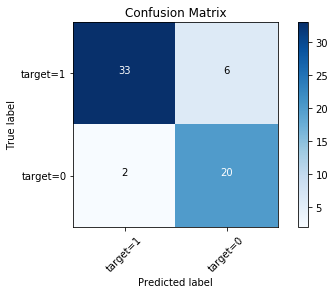

In [17]:
lr=LogisticRegression()
est, table, params = best_model(lr, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'solver':['liblinear', 'sag', 'newton-cg', 'lbfgs'],
                                              'C': [0.01, 0.05, 0.1, 0.5, 1, 5]}])
params


In [18]:
lr=LogisticRegression(C= 0.5, solver= 'liblinear').fit(X_train,y_train)
train=cross_val_score(lr,X=X_train,y=y_train,cv=4)
y_pred=lr.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(train.mean())
print(test_3)
print('coefficients corresponding to features')
print(pd.DataFrame(np.array(lr.coef_),columns=X_train.columns))
cl_r=classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.8015027322404371
0.8688524590163934
coefficients corresponding to features
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.009912 -1.125193  0.749209 -0.017009 -0.004825  0.364257  0.332291   

    thalach     exang   oldpeak     slope        ca     thal  
0  0.034651 -0.599777 -0.396478  0.456551 -0.821807 -0.88985  
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



**For logisitic regression the false negative error is higher than the false positive error which the behviour we prefer to prevail although the sample size is noticably low (61 observation)**

### Creating dummy variables

In [19]:

cols=['sex','fbs','slope','thal','restecg','exang']
#Auto encodes any dataframe column of type category or object.
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df
df_coded=one_hot(df,cols)

df_coded.drop(['sex','fbs','slope','thal','restecg','exang'],axis=1,inplace=True)
print(df_coded.columns)

dataX_coded=df_coded.iloc[:,:-1]
datay_coded=df_coded.iloc[:,-1]

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_0', 'sex_1', 'fbs_0', 'fbs_1', 'slope_0', 'slope_1', 'slope_2',
       'thal_0', 'thal_1', 'thal_2', 'thal_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'exang_0', 'exang_1'],
      dtype='object')


In [20]:
X_train_coded, X_test_coded, y_train_coded, y_test_coded =train_test_split(dataX_coded,datay_coded,test_size=0.2,random_state=6)

In [21]:

lr=LogisticRegression(C= 0.5, solver= 'liblinear').fit(X_train,y_train)
train=cross_val_score(lr,X=X_train,y=y_train,cv=4)
y_pred=lr.predict(X_test)
test_3=accuracy_score( y_test, y_pred, normalize=True, sample_weight=None)
print(train.mean())
print(test_3)
print('coefficients corresponding to features')
feat_lr=pd.DataFrame(np.array(lr.coef_),columns=X_train.columns)
feat_lr

0.8015027322404371
0.8688524590163934
coefficients corresponding to features


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.009912,-1.125193,0.749209,-0.017009,-0.004825,0.364257,0.332291,0.034651,-0.599777,-0.396478,0.456551,-0.821807,-0.88985


In [22]:
"""
refer=['sex_0','fbs_0','slope_0','thal_0','restecg_0','ca_0']
cols=[]
import statsmodels.api as sm
from scipy import stats

dataX_coded['intercept']=1
for feat in dataX_coded.columns :
    if feat not in refer :
        cols.append(feat)
print(cols)
print(dataX_coded.columns)
log_mod=sm.Logit(dataX_coded['target'],dataX_coded[cols])
results=log_mod.fit()
results.summary()
np.exp(results.params)
"""


"\nrefer=['sex_0','fbs_0','slope_0','thal_0','restecg_0','ca_0']\ncols=[]\nimport statsmodels.api as sm\nfrom scipy import stats\n\ndataX_coded['intercept']=1\nfor feat in dataX_coded.columns :\n    if feat not in refer :\n        cols.append(feat)\nprint(cols)\nprint(dataX_coded.columns)\nlog_mod=sm.Logit(dataX_coded['target'],dataX_coded[cols])\nresults=log_mod.fit()\nresults.summary()\nnp.exp(results.params)\n"

### KNN

{'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}
train mean score 0.7148224043715847
0.039546938789031254
test mean score 0.6398809523809523
0.039546938789031254
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        22
           1       0.82      0.85      0.84        39

    accuracy                           0.79        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.79      0.79      0.79        61



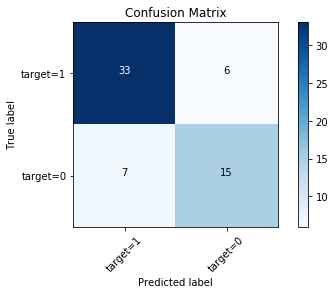

In [23]:

knn = KNeighborsClassifier()
est, table, params = best_model(knn, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'n_neighbors':list(range(1,30)),
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'leaf_size': [10, 20, 30, 40, 50],
                                             'weights':['uniform','distance'],
                                            'metric':['minkowski', 'euclidean', 'manhattan','chebyshev']}])

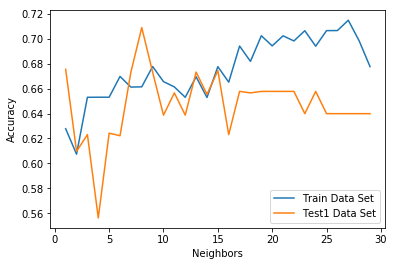

7

In [24]:
n_neighbors = range(1, 30)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,algorithm= 'ball_tree',leaf_size=20, metric= 'manhattan',  weights= 'uniform')
    knn.fit(X_train, y_train)
    
    train=cross_val_score(knn,X=X_train,y=y_train,cv=4)
    test=cross_val_score(knn,X=X_test,y=y_test,cv=4)
    train_data_accuracy.append(train.mean())
    test1_data_accuracy.append(test.mean())

plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()
np.argmax(test1_data_accuracy)

In [25]:
knn = KNeighborsClassifier(n_neighbors=n_neigh,algorithm= 'ball_tree',leaf_size=20, metric= 'manhattan',  weights= 'uniform')
knn.fit(X_train,y_train)
 
train=cross_val_score(knn,X=X_train,y=y_train,cv=4)

y_pred=knn.predict(X_test)
test=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(train.mean())
print(test)

0.6775956284153005
0.7377049180327869


### Random forest

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 30}
train mean score 0.7975409836065575
0.01756088957838408
test mean score 0.3601190476190476
0.01756088957838408
              precision    recall  f1-score   support

           0       0.70      0.86      0.78        22
           1       0.91      0.79      0.85        39

    accuracy                           0.82        61
   macro avg       0.81      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61



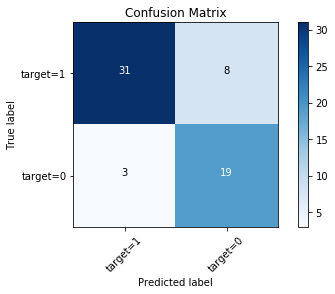

In [26]:
rf = RandomForestClassifier()
est, table, params = best_model(rf, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'criterion':['gini','entropy'],
                                              'max_depth': [1,5,10,50,100],
                                              'min_samples_split': [2,5,10,15,20,30],
                                              'min_samples_leaf':[1,5,10,20,50,100,200],
                                              'class_weight' : ['balanced', 'balanced_subsample', None],
                        
                                             }])

In [27]:
rf=RandomForestClassifier(class_weight= 'balanced', criterion= 'gini', max_depth=50, min_samples_leaf= 10, min_samples_split= 30)
rf.fit(X_train,y_train)
 
train=cross_val_score(rf,X=X_train,y=y_train,cv=4)

y_pred=rf.predict(X_test)
test=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(train.mean())
print(test)

0.7935792349726776
0.7868852459016393


In [28]:
rf=RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
 
train=cross_val_score(rf,X=X_train,y=y_train,cv=4)

y_pred=rf.predict(X_test)
test=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(train.mean())
print(test)

0.7893442622950819
0.8524590163934426


The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown 

In [29]:
X_train.columns


rf.feature_importances_
#.sort_values(by=['importance'])

pd.DataFrame(X_train.columns,rf.feature_importances_).sort_index(ascending=False)

,0
0.151378,cp
0.135310,ca
0.116441,thalach
0.107791,oldpeak
0.091029,thal
0.086065,age
0.078241,chol
0.072878,trestbps
0.053346,slope
0.045831,exang


### GBoost classifier

{'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'exponential', 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'subsample': 0.5}
train mean score 0.7687841530054644
0.040938214844812706
test mean score 0.7870535714285714
0.040938214844812706
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.94      0.87      0.91        39

    accuracy                           0.89        61
   macro avg       0.87      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



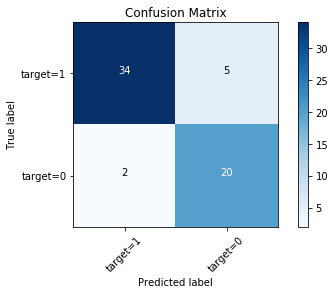

In [30]:

gb= GradientBoostingClassifier()
est, table, params = best_model(gb, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'loss':['deviance', 'exponential'],
                                              'learning_rate': [0.001,0.01,0.1,0.05],
                                              'n_estimators': [10,50,70,100,150,200],
                                              'subsample':[0.75,0.6,0.5],
                                              'criterion' : ['friedman_mse', 'mse', 'mae'],
                                              'min_samples_split':[2,10,20,50],
                                              'max_features':['auto','sqrt','log2',None]
                                              
                                              
                        
                                             }])

In [31]:
gb=GradientBoostingClassifier(criterion= 'mae', learning_rate= 0.05, loss='deviance',max_features= 'sqrt', min_samples_split= 20, n_estimators= 50, subsample= 0.5).fit(X_train,y_train)
 
train=cross_val_score(gb,X=X_train,y=y_train,cv=4)
gb.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print(train.mean())
print(test_3)

0.8183743169398907
0.8524590163934426


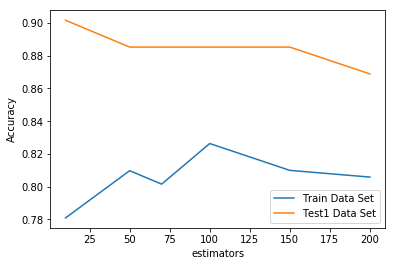

150

In [32]:
n_estimators= [10,50,70,100,150,200]
train_data_accuracy = []
test1_data_accuracy = []
test2_data_accuracy = []
for n in n_estimators:
    gb =GradientBoostingClassifier(criterion= 'mae', learning_rate= 0.05, loss='deviance',max_features= 'sqrt', min_samples_split= 20, n_estimators= n, subsample= 0.5).fit(X_train,y_train)
 
    gb.fit(X_train, y_train)
    y_pred=gb.predict(X_test)
    test_set=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    train=cross_val_score(gb,X=X_train,y=y_train,cv=4)
    test=cross_val_score(gb,X=X_test,y=y_test,cv=4)
    
    train_data_accuracy.append(train.mean())
    test1_data_accuracy.append(test.mean())
    test2_data_accuracy.append(test_set)
plt.plot(n_estimators, train_data_accuracy, label="Train Data Set")
plt.plot(n_estimators,  test2_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("estimators")
plt.legend()
plt.show()
n_estimators[np.argmax(test1_data_accuracy)]

{'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 150}
train mean score 0.8181693989071037
0.0232324799849351
test mean score 0.7535714285714286
0.0232324799849351
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.92      0.85      0.88        39

    accuracy                           0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.86      0.85      0.85        61



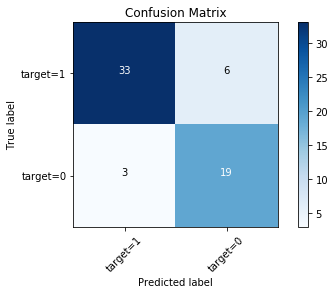

In [33]:

ab=  AdaBoostClassifier()
est, table, params = best_model(ab, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{
                                              'learning_rate': [0.001,0.01,0.1,0.05],
                                              'n_estimators': [10,50,70,100,150,200],
                                              'algorithm' :['SAMME', 'SAMME.R']
                          
                                
                                              
                        
                                             }])

In [34]:
ab=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 150).fit(X_train,y_train)

y_pred=ab.predict(X_test)

test_2=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
train=cross_val_score(ab,X=X_train,y=y_train,cv=4)


print(train.mean())
print(test_2)

0.8098360655737704
0.8852459016393442


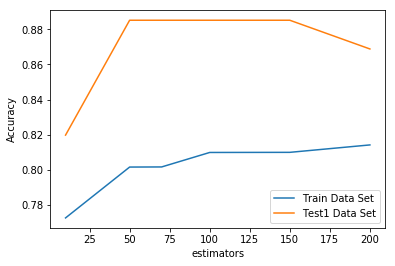

150

In [35]:
n_estimators= [10,50,70,100,150,200]
train_data_accuracy = []
test1_data_accuracy = []
test2_data_accuracy = []
for n in n_estimators:
    ab=AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= n)
    ab.fit(X_train, y_train)
    y_pred=ab.predict(X_test)
    test_set=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    train=cross_val_score(ab,X=X_train,y=y_train,cv=4)
    test=cross_val_score(ab,X=X_test,y=y_test,cv=4)
    
    train_data_accuracy.append(train.mean())
    test1_data_accuracy.append(test.mean())
    test2_data_accuracy.append(test_set)
plt.plot(n_estimators, train_data_accuracy, label="Train Data Set")
plt.plot(n_estimators,  test2_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("estimators")
plt.legend()
plt.show()
n_estimators[np.argmax(test1_data_accuracy)]

{'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 70}
train mean score 0.8224043715846995
0.02367845381254802
test mean score 0.7703869047619047
0.02367845381254802
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        22
           1       0.91      0.77      0.83        39

    accuracy                           0.80        61
   macro avg       0.79      0.82      0.80        61
weighted avg       0.83      0.80      0.81        61



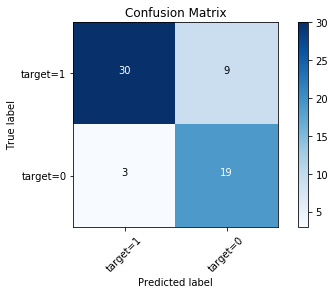

In [36]:
b=BaggingClassifier()
est, table, params = best_model(b, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{
                                              
                                              'n_estimators': [10,50,70,100,150,200],
                                              
                                              'max_samples':[0.5,0.6,0.7,0.8,1.0],
                                               
                                               'max_features':[0.5,0.6,0.7,0.8,1.0],
                                             'bootstrap':[True,False],
                                           'bootstrap_features':[True,False]}])

In [37]:
b=BaggingClassifier(bootstrap= False, bootstrap_features= False, max_features= 0.5, max_samples= 0.6, n_estimators= 50).fit(X_train,y_train)

y_pred=b.predict(X_test)

test_1=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
train=cross_val_score(b,X=X_train,y=y_train,cv=4)


print(train.mean())
print(test_1)

0.8265027322404372
0.8032786885245902


In [38]:
g=GaussianNB()
g.fit(X_train,y_train)
y_pred=g.predict(X_test)

test_1=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
train=cross_val_score(g,X=X_train,y=y_train,cv=4)


print(train.mean())
print(test_1)
                                         

0.78551912568306
0.8524590163934426


{'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant', 'solver': 'adam'}
train mean score 0.701844262295082
0.1369017930892746
test mean score 0.7758928571428572
0.1369017930892746
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.85      0.90      0.88        39

    accuracy                           0.84        61
   macro avg       0.83      0.81      0.82        61
weighted avg       0.83      0.84      0.83        61



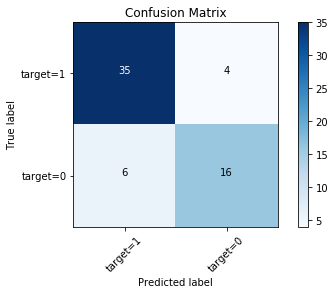

In [39]:
ml=MLPClassifier()
est, table, params = best_model(ml, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{
                                              
                                              'hidden_layer_sizes': [(100,),(50,),(70,),(20,),(10,),(6,)],
                                              
                                              'activation':['identity', 'logistic', 'tanh', 'relu'],
                                               
                                               'solver':['lbfgs', 'sgd', 'adam'],
                                             'alpha':[0.0001,0.001,0.01,0.73],
                                           'learning_rate':['constant', 'invscaling', 'adaptive'] 
                                }])

In [40]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()

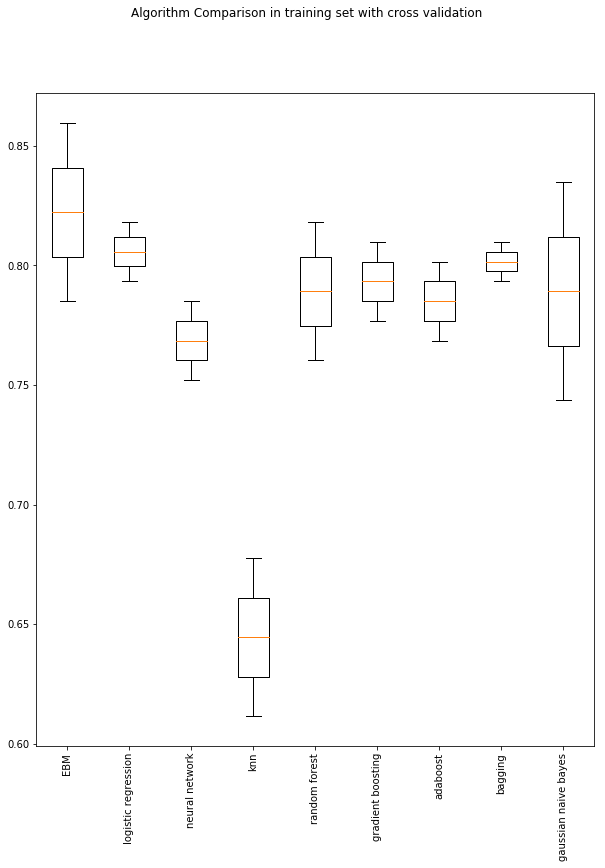

In [41]:
X_train, X_test, y_train, y_test =train_test_split(dataX,datay,test_size=0.2,random_state=8)
scoring='accuracy'
results = []
results_t=[]
names = []



models={'EBM':ebm,'logistic regression':lr ,'neural network':ml,'knn':knn ,'random forest':rf ,'gradient boosting':gb ,'adaboost':ab,'bagging':b,'gaussian naive bayes':g}
modelDF = pd.DataFrame(columns=['model','CV-mean','CV-std'])
countDF = 0

for name, model in models.items():
    kfold = KFold(n_splits=2, random_state=0)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    test=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    results_t.append(test)
    results.append(cv_results)
    names.append(name)
    msg = "%s:  %f  (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)
    modelDF.loc[countDF]=[name, cv_results.mean(), cv_results.std()]
    countDF = countDF + 1

# boxplot
fig = plt.figure(figsize=(10,12))
fig.suptitle('Algorithm Comparison in training set with cross validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)

plt.show()

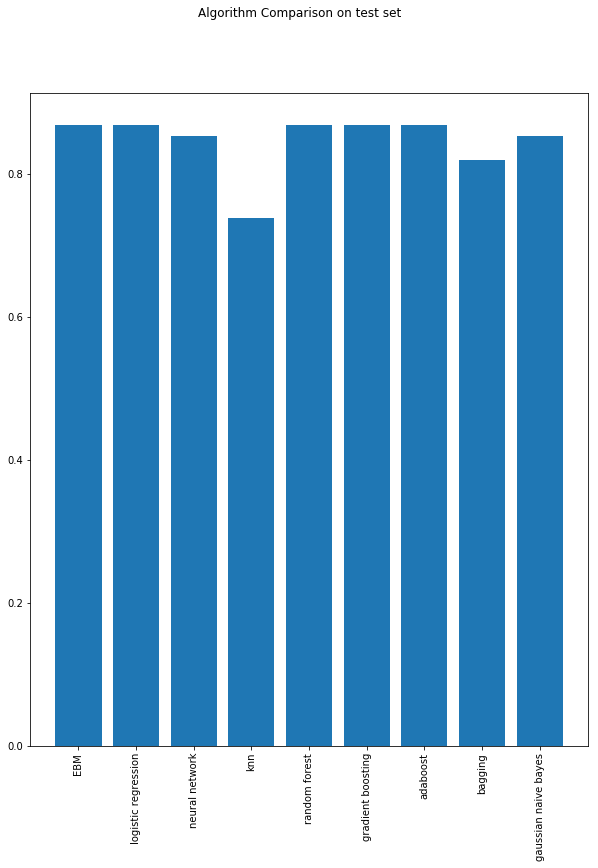

In [42]:
# boxplot
fig = plt.figure(figsize=(10,12))
fig.suptitle('Algorithm Comparison on test set')
ax = fig.add_subplot(111)
plt.bar(names,results_t,)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
modelDF['test_accuracy']=results_t
plt.show()

In [43]:
modelDF.sort_values(['test_accuracy'], ascending=False)


,model,CV-mean,CV-std,test_accuracy
0,EBM,0.822314,0.037190,0.868852
1,logistic regression,0.805785,0.012397,0.868852
4,random forest,0.789256,0.028926,0.868852
5,gradient boosting,0.793388,0.016529,0.868852
6,adaboost,0.785124,0.016529,0.868852
2,neural network,0.768595,0.016529,0.852459
8,gaussian naive bayes,0.789256,0.045455,0.852459
7,bagging,0.801653,0.008264,0.819672
3,knn,0.644628,0.033058,0.737705


Adaboost scored the highest among the the algorithms used , linear regression performing well indicated that this data is linearly seprable , lower performance of knn can be deduced as it is often successful when the decision boundary is very irregular which clearly not the case here.



An aspect to consider here is why adaboost performed better , adaboost uses an exponential loss curve that penalize examples that deviates more from the right answer stronger while it penalize that which don't deviate much less , when the data given is cleaner with less noise (wrong classification) it performs well , wrong labeling degrade the performance also for against
overlapping class distributions Adaboost underperform


from overview on several papers puplished in same domain(prediction of heart disease) on similar datasets , gradient boosting and SVMs showed best results

**for the initial model i shall use logistic regression with hyperparameters tunning

### Studies related to the same problem

* 1- A reseaech article (Can machine-learning improve cardiovascularrisk prediction using routine clinical data?) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5380334/pdf/pone.0174944.pdf

was aiming to predict the occurance of a heart attack in 10 years time for patient comparing the predictions against the 
Established approaches to CVD risk assessment,that is recommended by the American Heart Association/American College of Cardiology (ACC/AHA) --> it forms a linear equation with input features

http://tools.acc.org/ASCVD-Risk-Estimator-Plus/#!/calculate/estimate/

http://statics.drvoice.cn/uploadfile/2018/0610/20180610022207108.pdf

https://www.ahajournals.org/doi/full/10.1161/01.cir.0000437741.48606.98?url_ver=Z39.88-2003&rfr_id=ori:rid:crossref.org&rfr_dat=cr_pub%3dpubmed

**Guideline on the Assessment of Cardiovascular Risk** 

with dataset of 378,256 patients testing with 4 different machine learning algorithms (gradient boosting , logisitic regression , random forest , neural networks)

the analysis cohort consisted of 378,256 patients. This cohort was then randomly split into a 75% sample of 295,267 patients to 
train the machine-learning algorithms and the remaining sample of 82,989 patients for validation

baseline features used in the base algorithm   : (gender, age, smoking status, systolic blood pressure, blood pressure treatment, total cholesterol, HDL cholesterol, and diabetes) similar to that used in our case

Other new risk
factors not found in any previous risk prediction tools but determined by machine-learning
included medical conditions such as COPD and severe mental illness, prescribing of oral corticosteroids,
as well as biomarkers such as triglyceride levels.

22 features were added from sources : within literature on other potential CVD risk factors from cited papers *1 *2, and further reviewed by practising clinicians 



risk assessment results basline model :  (AUC 0.728, 95% CI 0.723±0.735)

The ACC/AHA baseline model correctly predicted 53,106 non-cases from 75,585 total noncases,
resulting in a specificity of 70.3% and NPV of 95.1%

* Random forest +1.7% (AUC 0.745, 95% CI 0.739±0.750)
* Logistic regression +3.2% (AUC 0.760, 95% CI 0.755±0.766),
* Gradient boosting +3.3% (AUC 0.761, 95% CI 0.755±0.766), 
* Neural networks +3.6% (AUC 0.764, 95% CI 0.759±0.769).




*1 Eeg-Olofsson K, Cederholm J, Nilsson PM, Zethelius B, Svensson AM, Gudbjornsdottir S, et al. New
aspects of HbA1c as a risk factor for cardiovascular diseases in type 2 diabetes: an observational study

*2 Weng SF, Kai J, Guha IN, Qureshi N. The value of aspartate aminotransferase and alanine aminotransferase
in cardiovascular disease risk assessment. Open Heart 2015; 2(e000272): 1±10.





* 2- another research paper using similar features to that used in our project 
https://www.ahajournals.org/doi/pdf/10.1161/JAHA.118.009476

utilizing SVMs and **NEATER algorithm to cope with skewed target of data** ,it is a data augmentation algorithm that is based on filtering oversampled data using cooperative game theory. 

The ML Risk calculator tested on “White Race” only data set achieved a sensitivity of 0.74, specificity of 0.87, and accuracy of 0.84, much higher than ACC/AHA Risk Calculator (sensitivity 0.63,specificity 0.69, and accuracy 0.68). 




### Enhancing algorithims that scored the highest (logistic regression , gradient boosting, neural network):

**problems with logistic regression that can be enhanced :**

* failure to incorporate non-monotonic relationships--A non-monotonic function is a function that is increasing and decreasing on different intervals of its domain.--, can be partly solved by numeric variables quantization (using classification trees, for example) as in research paper https://link.springer.com/article/10.1057/jt.2010.3

  Regression models assume that the relationship between the predictor variables and the dependent variable is uniform, i.e.,     follows a particular direction – this may be positive or negative, linear or nonlinear but is constant over the entire range   of values. This assumption may not hold true for certain associations , here in the data for gender , males tends to have       more risk of heart diseaes but after reaching an older age women starts to have higher risk of heart disease 


* regression equations derived from a specific set of patients (e.g., in a developed country with advanced medical care) may not apply to patients with different characteristics (e.g., in areas without intensive care units).

* If input variables are highly correlated with one another (known as multicollinearity), then the effect of each on the         regression model becomes less precise.the regression model should include only one of the     two or more inter-related predictors

### **Approaches of enhancements :**

*implemented* :
* 1- CART-LOGISTIC MODEL : using a two-stage model , where the first stage is classfier cart tree , grouping data points with similar features into segement and then applying logistic regression algorithm on each segement

* 2- RF-LOGITIC MODEL : the same approach above , using random forest ,the above approach degraded the performance and overfitted the model as the sample size is too small

* 3-STACKED MODEL : using stacked models having a model with 2 stages , the first stage contain several base algorithms , outputs predictions for each base algorithm and it is treated as the input to the second stage

using PCA to better find complementary models

* 4- MAJORTY MODEL :using several algorithms and apply a majority vote to output a prediction

* use the segments formed by the tree as an indicator of areas in the feature sppace where the model underperform 

*to be implemented* :

* more robust measurments of accuracy 

When we use accuracy, we assign equal cost to false positives and false negatives. When that data set is imbalanced - say it   has 99% of instances in one class and only 1 % in the other - there is a great way to lower the cost. Predict that every       instance belongs to the majority class, get accuracy of 99% and go home early. in our case more wieght is given to decrease     false negatives


https://link.springer.com/article/10.1057/jt.2010.3

* dealing with the skewed distribution of target variable




###  CART-LOGISTIC MODEL :

Using classfication trees to separate data points with similar features into different classes , monotonic functions can be applied on these classes only , allowing different behaviour in each class ,
instead of using CHAID trees proposed in the model we use cart because of 2 reasons :

* 1-because chaid perform in each branch more than 1 split , need a sample size of a large number as it depend on chi-square test, while cart perform binary split

* 2-the way the tree is grown in cart is different , where it's overgrown then it is pruned to remove unnesscary split which is an advance over chaid , chaid perform pre-pruning where it doesn't perform the split unless a certain criteria is met




In [44]:
cols=['sex','cp','fbs','slope','thal','restecg']
#Auto encodes any dataframe column of type category or object.
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df
df_coded=one_hot(df,cols)
dataX_coded=df_coded.iloc[:,:-1]
datay_coded=df_coded.iloc[:,-1]

In [45]:
X_train_coded, X_test_coded, y_train_coded, y_test_coded =train_test_split(dataX_coded,datay_coded,test_size=0.2,random_state=6)

In [46]:
X_train_mod=X_train.drop(['cp'],axis=1)
X_test_mod=X_test.drop(['cp'],axis=1)

In [47]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_leaf=60).fit(X_train_mod,y_train)
train=cross_val_score(clf,X=X_train_mod,y=y_train,cv=4)
y_pred=clf.predict(X_test_mod)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

print('cross validation on train set of CART',train.mean())
print('test set accuracy of CART',test_3)
print(X_test.shape)
print("node counts : ", clf.tree_.node_count)

print("max_depth of tree", clf.tree_.max_depth)
print("feature to split on for every node " ,clf.tree_.feature)
print("feature importance",clf.feature_importances_)

print(clf.tree_.__getstate__())
clf.predict(X_test_mod)

cross validation on train set of CART 0.7189890710382514
test set accuracy of CART 0.6721311475409836
(61, 13)
node counts :  5
max_depth of tree 2
feature to split on for every node  [10  6 -2 -2 -2]
feature importance [0.         0.         0.         0.         0.         0.
 0.19018385 0.         0.         0.         0.80981615 0.        ]
{'max_depth': 2, 'node_count': 5, 'nodes': array([( 1,  4, 10,   0.5, 0.49914623, 242, 242.),
       ( 2,  3,  6, 159.5, 0.38887755, 140, 140.),
       (-1, -1, -2,  -2. , 0.48799841,  71,  71.),
       (-1, -1, -2,  -2. , 0.18231464,  69,  69.),
       (-1, -1, -2,  -2. , 0.34928874, 102, 102.)],
      dtype=[('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]), 'values': array([[[116., 126.]],

       [[ 37., 103.]],

       [[ 30.,  41.]],

       [[  7.,  62.]],

       [[ 79.,  23.]]])}


array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
from sklearn.tree import export_graphviz
#http://webgraphviz.com/
tree.export_graphviz(clf,out_file='tree.dot')

In [49]:
leaves=clf.apply(X_train_mod)
leaves

array([2, 4, 3, 2, 4, 4, 2, 3, 4, 4, 4, 4, 2, 3, 4, 3, 4, 4, 4, 4, 2, 4,
       3, 4, 2, 2, 4, 2, 4, 4, 3, 2, 4, 4, 3, 2, 2, 3, 2, 3, 3, 3, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 3, 2, 4, 3, 2, 2, 2, 2, 4, 4, 4, 3, 2, 4, 4,
       2, 4, 3, 4, 3, 3, 2, 3, 2, 4, 3, 3, 4, 3, 2, 3, 4, 2, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 3, 3, 4, 3, 4, 4, 2, 2, 3, 4, 3,
       4, 4, 3, 2, 3, 4, 4, 4, 2, 4, 2, 4, 2, 4, 3, 2, 4, 3, 4, 3, 2, 2,
       4, 2, 4, 2, 3, 4, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 4, 2, 3, 3, 2, 2,
       4, 4, 4, 2, 2, 3, 2, 3, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 3,
       2, 3, 2, 4, 3, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 3, 4, 2, 3, 4, 2,
       3, 3, 3, 3, 3, 2, 3, 4, 4, 3, 3, 4, 3, 2, 4, 4, 4, 3, 4, 3, 2, 4,
       2, 4, 3, 2, 3, 4, 2, 4, 4, 2, 3, 4, 2, 2, 3, 2, 3, 3, 2, 4, 2, 2],
      dtype=int64)

In [50]:

num_1=[]
num_2=[]
num_3=[]
num_4=[]

for i , value in enumerate(leaves) :
    i=i+1
    if value==2 :
        num_1.append(X_train.iloc[i-1:i,:].index.values)
    elif value==3 :
        num_2.append(X_train.iloc[i-1:i,:].index.values)
    elif value==4:
        num_3.append(X_train.iloc[i-1:i,:].index.values) 
    else :
        num_4.append(X_train.iloc[i-1:i,:].index.values)

        

In [51]:
len(num_1),len(num_2),len(num_3),len(num_4)

(71, 69, 102, 0)

In [52]:
X_train_mod.columns[10],X_train_mod.columns[6]

('ca', 'thalach')

In [53]:
X_train_1=X_train[X_train.index.isin(num_1)]
y_train_1=y_train[y_train.index.isin(num_1)]
X_train_2=X_train[X_train.index.isin(num_2)]
y_train_2=y_train[y_train.index.isin(num_2)]
X_train_3=X_train[X_train.index.isin(num_3)]
y_train_3=y_train[y_train.index.isin(num_3)]
#X_train_4=X_train[X_train.index.isin(num_4)]
#y_train_4=y_train[X_train.index.isin(num_4)]

In [54]:
datasets=[(X_train_1,y_train_1),(X_train_2,y_train_2),(X_train_3,y_train_3)]
for i,data in enumerate(datasets):
    i=i+1
    X_train1,y_train1=data
    print()
    if y_train1.all()==1  :
        y_pred=clf.predict(X_test_mod)
        test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    else :
        lr=LogisticRegression().fit(X_train1,y_train1)
        print('coefficients corresponding to features in subspace {}'.format(i))
        print(pd.DataFrame(np.array(lr.coef_),columns=X_train.columns))
        train=cross_val_score(lr,X=X_train1,y=y_train1,cv=4)
        y_pred=lr.predict(X_test)
        print('test set size',X_test.shape[0])
        test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print('cross validation on training set logistic regression on set{}'.format(i),train.mean())
    print('*'*50)
    print('test set accuracy on test set logistic regression on set{}'.format(i),test_3)
    print('*'*100)


coefficients corresponding to features in subspace 1
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.074095 -1.049734  0.366177 -0.038164 -0.005266  0.550269 -0.302459   

    thalach     exang   oldpeak     slope   ca      thal  
0  0.046608 -0.947133 -0.159943 -0.041675  0.0 -1.385492  
test set size 61
cross validation on training set logistic regression on set1 0.8058565531475749
**************************************************
test set accuracy on test set logistic regression on set1 0.8360655737704918
****************************************************************************************************

coefficients corresponding to features in subspace 2
        age      sex        cp  trestbps      chol      fbs   restecg  \
0  0.025108 -0.48714  1.179462  0.024815 -0.003884  0.28287  0.339779   

    thalach     exang   oldpeak     slope   ca      thal  
0  0.003973 -0.284338 -0.803214  0.388622  0.0 -1.268241  
test set size 61
cross validatio

**This approach degraded the performance of the model remarkably and didn't obtain desired output**



 ### RF-LOGISTIC MODEL

In [55]:

rf=RandomForestClassifier(min_samples_leaf=60).fit(X_train,y_train)
train=cross_val_score(rf,X=X_train,y=y_train,cv=4)
y_pred=gb.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('cross validation on train set random forest',train.mean())
print('test set accuracy random forest',test_3)

rf.predict(X_test)

cross validation on train set random forest 0.5581284153005465
test set accuracy random forest 0.8688524590163934


array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [56]:
rf.apply(X_train)

array([[1, 2, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 2, 2, ..., 2, 1, 1],
       ...,
       [2, 2, 1, ..., 1, 2, 2],
       [1, 1, 1, ..., 2, 1, 1],
       [1, 1, 2, ..., 2, 1, 1]], dtype=int64)

In [57]:
rf.apply(X_train).reshape(-1,).shape

(2420,)

In [58]:
def find_majority(k):
    myMap = {}
    maximum = ( '', 0 ) # (occurring element, occurrences)
    for n in k:
        if n in myMap: myMap[n] += 1
        else: myMap[n] = 1

        # Keep track of maximum on the go
        if myMap[n] > maximum[1]: maximum = (n,myMap[n])

    return maximum
find_majority(rf.apply(X_train).reshape(-1,)[0:100]),find_majority(rf.apply(X_train).reshape(-1,)[100:200]),find_majority(rf.apply(X_train).reshape(-1,)[200:300])

((2, 54), (2, 55), (2, 51))

In [59]:
k={}
k_average={}
for i in range(2421):
    i1=0
    if i %10==0 :
        #print(np.mean(gb.apply(X_train).reshape(-1,)[i1:i])
        #k_average[i/100]=np.mean(gb.apply(X_train).reshape(-1,)[i1:i][0])
        k[i/10]=find_majority(rf.apply(X_train).reshape(-1,)[i1:i])[0]
        i1+=11


In [60]:
k.pop(0.0)

''

In [61]:
len(k.values()),X_train.shape

(242, (242, 13))

In [62]:
rf.apply(X_train).reshape(-1,)[0:200] , (k.values())

(array([1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
        2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
        2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2,
        2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
        2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
        1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
        1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
        2, 2], dtype=int64),
 dict_values([1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [63]:
num_11=[]
num_22=[]
num_33=[]
num_44=[]

for i , value in k.items():
      i=int(i)
      
     
      if value==1 :
        num_11.append(X_train.iloc[i-1:i,:].index.values)
      elif value==2 :
        num_22.append(X_train.iloc[i-1:i,:].index.values)
      #elif value==3:
      #  num_33.append(X_train.iloc[i-1:i,:].index.values)
      else :
        num_44.append(X_train.iloc[i-1:i,:].index.values)
    



In [64]:
X_train_11=X_train[X_train.index.isin(num_11)]
y_train_11=y_train[y_train.index.isin(num_11)]
X_train_22=X_train[X_train.index.isin(num_22)]
y_train_22=y_train[y_train.index.isin(num_22)]
X_train_33=X_train[X_train.index.isin(num_33)]
y_train_33=y_train[y_train.index.isin(num_33)]
X_train_44=X_train[X_train.index.isin(num_44)]
y_train_44=y_train[y_train.index.isin(num_44)]


In [65]:
len(num_11),len(num_22),len(num_33),len(num_44)

(201, 41, 0, 0)

In [66]:
#,(X_train_33,y_train_33)
datasets=[(X_train_11,y_train_11),(X_train_22,y_train_22)]
for i,data in enumerate(datasets):
    i=i+1
    X_train1,y_train1=data
    print()
    if y_train1.all()==1  :
        y_pred=clf.predict(X_test_mod)
        test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    else :
        lr=LogisticRegression().fit(X_train1,y_train1)
        print('coefficients corresponding to features in subspace {}'.format(i))
        print(pd.DataFrame(np.array(lr.coef_),columns=X_train.columns))
        train=cross_val_score(lr,X=X_train1,y=y_train1,cv=4)
        y_pred=lr.predict(X_test)
        print('test set size',X_test.shape[0])
        test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
       
        print('classification error',classification_report(y_test, y_pred))
    print('cross validation on training set logistic regression on set{}'.format(i),train.mean())
    print('*'*50)
    print('test set accuracy on test set logistic regression on set{}'.format(i),test_3)
    print('*'*100)



coefficients corresponding to features in subspace 1
        age       sex        cp  trestbps      chol      fbs   restecg  \
0  0.011438 -1.336151  0.673552 -0.018883 -0.005888  0.65395  0.448315   

   thalach     exang   oldpeak     slope        ca      thal  
0  0.04334 -0.922849 -0.325614  0.369475 -1.173767 -1.092482  
test set size 61
classification error               precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.94      0.82      0.88        39

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

cross validation on training set logistic regression on set1 0.8205882352941176
**************************************************
test set accuracy on test set logistic regression on set1 0.8524590163934426
**************************************************************************************************

In [67]:
feat_lr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.009912,-1.125193,0.749209,-0.017009,-0.004825,0.364257,0.332291,0.034651,-0.599777,-0.396478,0.456551,-0.821807,-0.88985


**using random forest separations of segments of features in space is obtained ,creating a logistic regression equation for each segement , one similar to that over all the model and the other was specific to that segment , this approach didn't yield the desired optimized output , the main problem is that the classfication of the trees over small sample size doesn't give comprehensible segments of data points for of similar features**

 ### STACKED MODEL
 
 #### first using PCA to discover areas of feature space that each of classifier cover and which algorithims can be complementary to each other

In [68]:
X_train, X_test, y_train, y_test =train_test_split(dataX,datay,test_size=0.2,random_state=8)

In [69]:
from vecstack import stacking


models = [LogisticRegression(), GradientBoostingClassifier(),KNeighborsClassifier()]

S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)
model = LogisticRegression() 
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

print('classification_report',classification_report(y_test, y_pred))

print('logistic regression --- gradient boosting',model.coef_)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.88524590]
    fold  1:  [0.81967213]
    fold  2:  [0.88333333]
    fold  3:  [0.78333333]
    ----
    MEAN:     [0.84289617] + [0.04334672]
    FULL:     [0.84297521]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.78688525]
    fold  1:  [0.77049180]
    fold  2:  [0.88333333]
    fold  3:  [0.80000000]
    ----
    MEAN:     [0.81017760] + [0.04351104]
    FULL:     [0.80991736]

model  2:     [KNeighborsClassifier]
    fold  0:  [0.68852459]
    fold  1:  [0.59016393]
    fold  2:  [0.66666667]
    fold  3:  [0.65000000]
    ----
    MEAN:     [0.64883880] + [0.03652699]
    FULL:     [0.64876033]

Final prediction score: [0.83606557]
classification_report               precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.94     

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


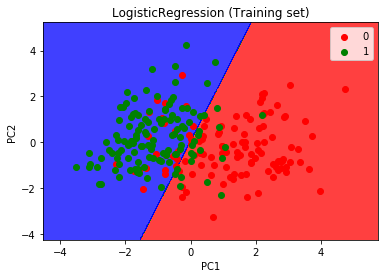

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


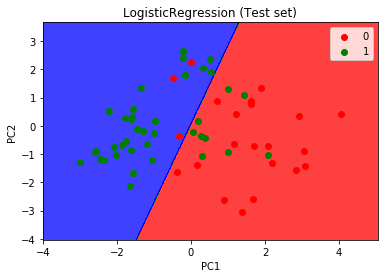

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


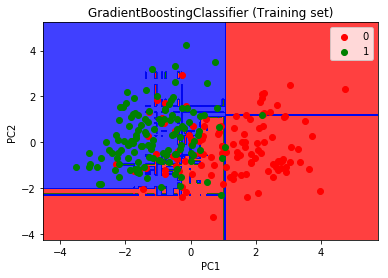

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


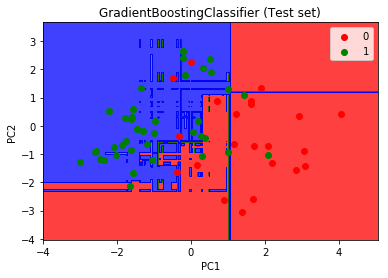

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


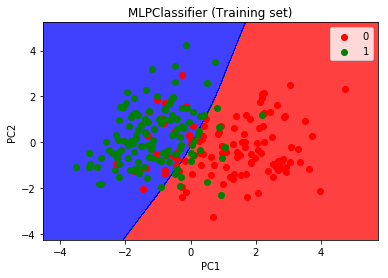

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


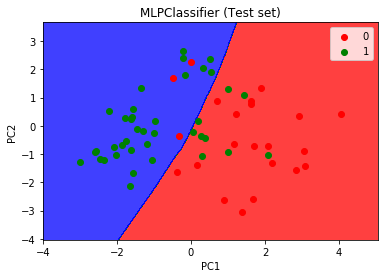

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


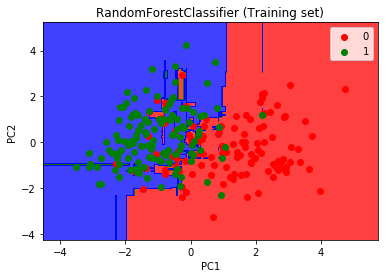

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


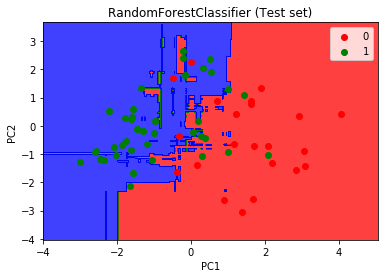

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


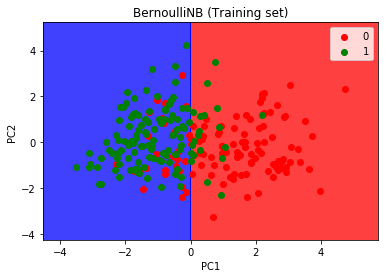

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


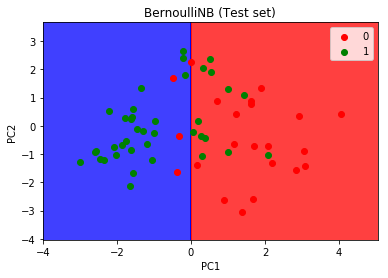

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


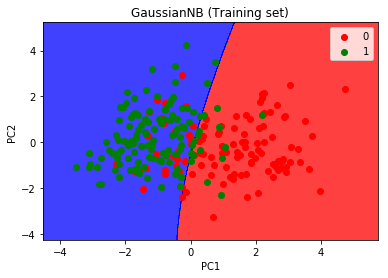

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


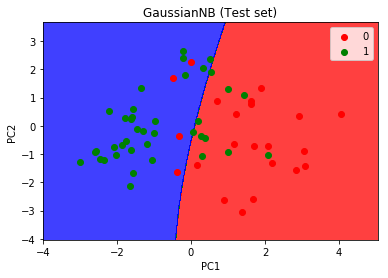

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


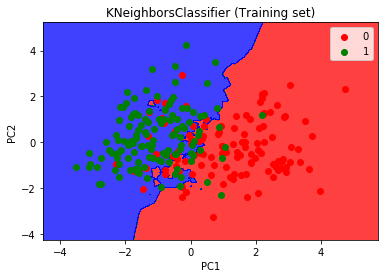

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


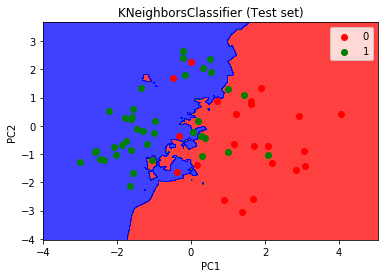

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifiers= [LogisticRegression() ,GradientBoostingClassifier(),  MLPClassifier(),RandomForestClassifier(), BernoulliNB(),
              GaussianNB(),KNeighborsClassifier()]
for instance in classifiers :
    classifier = instance.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualising the Training set results
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('{} (Training set)'.format(str(instance).split('(')[0]))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

    # Visualising the Test set results
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    plt.title('{} (Test set)'.format(str(instance).split('(')[0]))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

#### Gradient boosting and knn irregular boundaries between classes can complement the linear behaviour of logistic regression , trying the idea of ensembling of various model that differ in behaviour

In [71]:
#X_train, X_test, y_train, y_test =train_test_split(dataX,datay,test_size=0.2,random_state=6)

In [72]:
from vecstack import stacking
from sklearn import  linear_model

models = [ LogisticRegression(), GradientBoostingClassifier()]

S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=3, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)
S_model = LogisticRegression() 
    
S_model = S_model.fit(S_train, y_train)
y_pred = S_model.predict(S_test)
print('Final prediction score of ENSEMBLE: [%.8f]' % accuracy_score(y_test, y_pred))

print('logistic regression --- gradient boosting',model.coef_)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [LogisticRegression]
    fold  0:  [0.85185185]
    fold  1:  [0.83950617]
    fold  2:  [0.80000000]
    ----
    MEAN:     [0.83045267] + [0.02211527]
    FULL:     [0.83057851]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.75308642]
    fold  1:  [0.72839506]
    fold  2:  [0.76250000]
    ----
    MEAN:     [0.74799383] + [0.01438141]
    FULL:     [0.74793388]

Final prediction score of ENSEMBLE: [0.80327869]
logistic regression --- gradient boosting [[2.09508392 1.17112079 0.50954377]]


In [73]:
X_train, X_test, y_train, y_test =train_test_split(dataX,datay,test_size=0.2,random_state=8)

In [74]:

models = [LogisticRegression(), GradientBoostingClassifier()]
datasets=[(X_train_11,y_train_11),(X_train_22,y_train_22)]
datasets_s=[]
for i,data in enumerate(datasets):
    X_train12,y_train12=data
    print('before stacking',X_train12.shape)
    print('before stacking',y_train12.shape)
    print(X_test.shape)
    S_train, S_test = stacking(models,                   
                           X_train12, y_train12, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=3, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,  verbose=2)
    print('after stacking',S_train.shape)
    print('after stacking',S_test.shape)
    datasets_s.append((S_train, y_train12, S_test))


before stacking (201, 13)
before stacking (201,)
(61, 13)
task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [LogisticRegression]
    fold  0:  [0.80597015]
    fold  1:  [0.76119403]
    fold  2:  [0.86567164]
    ----
    MEAN:     [0.81094527] + [0.04279764]
    FULL:     [0.81094527]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.82089552]
    fold  1:  [0.70149254]
    fold  2:  [0.82089552]
    ----
    MEAN:     [0.78109453] + [0.05628711]
    FULL:     [0.78109453]

after stacking (201, 2)
after stacking (61, 2)
before stacking (41, 13)
before stacking (41,)
(61, 13)
task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [LogisticRegression]
    fold  0:  [0.71428571]
    fold  1:  [0.57142857]
    fold  2:  [0.76923077]
    ----
    MEAN:     [0.68498168] + [0.08336855]
    FULL:     [0.6

### Measure the performance of stacked model in areas in feature space where logistic regression only  under-performed

In [75]:
for i,data in enumerate(datasets_s):
    i=i+1
    X_train1,y_train1,test_set=data
    print(X_train1.shape)
    print(y_train1.shape)
    if y_train1.all()==1  :
       
        y_pred=S_model.predict(X_train1)
        test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    else :

        y_pred=S_model.predict(X_train1)
        train=cross_val_score(S_model,X=X_train1,y=y_train1,cv=3)
        y_pred=S_model.predict(test_set)
        print('test set size',test_set.shape[0])
        test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
        print('classification_report',classification_report(y_test, y_pred))
    print('cross validation on training set stacked model on set{}'.format(i),train.mean())
    print('*'*50)
    print('test set accuracy on test set stacked model on set{}'.format(i),test_3)
    print('*'*100)

(201, 2)
(201,)
test set size 61
classification_report               precision    recall  f1-score   support

           0       0.71      0.91      0.80        22
           1       0.94      0.79      0.86        39

    accuracy                           0.84        61
   macro avg       0.83      0.85      0.83        61
weighted avg       0.86      0.84      0.84        61

cross validation on training set stacked model on set1 0.8109452736318409
**************************************************
test set accuracy on test set stacked model on set1 0.8360655737704918
****************************************************************************************************
(41, 2)
(41,)
test set size 61
classification_report               precision    recall  f1-score   support

           0       0.77      0.77      0.77        22
           1       0.87      0.87      0.87        39

    accuracy                           0.84        61
   macro avg       0.82      0.82      0.82       

In [76]:
print(cl_r)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



**using random forest model separations of segments of features in space is obtained ,creating a stacked model to predict for each segement , it scored higher than that of solely logistic regression in that specific segement but lower than the logistic regression model over all training data**

### MAJORITY MODEL

In [77]:
from sklearn.ensemble import VotingClassifier

gb=GradientBoostingClassifier().fit(X_train,y_train)
train=cross_val_score(gb,X=X_train,y=y_train,cv=4)
y_pred=gb.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
#print('cross validation on train set gradient boosting',train.mean())
print('test set accuracy gradient boosting',test_3)

lr=LogisticRegression().fit(X_train,y_train)
train=cross_val_score(lr,X=X_train,y=y_train,cv=4)
y_pred=lr.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
#print('cross validation on train set',train.mean())
print('test set accuracy  logistic regression',test_3)


ml=MLPClassifier().fit(X_train,y_train)
train=cross_val_score(ml,X=X_train,y=y_train,cv=4)
y_pred=ml.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
#print('cross validation on train set on neural net',train.mean())
print('test set accuracy  on neural net',test_3)


estimators=[('gb',gb), ('lr', lr), ('ml', ml)]

ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train,y_train)
y_pred=ensemble.predict(X_test)
test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
print('test set accuracy majority model',test_3)

test set accuracy gradient boosting 0.8524590163934426
test set accuracy  logistic regression 0.8688524590163934
test set accuracy  on neural net 0.7704918032786885
test set accuracy majority model 0.8524590163934426


In [78]:
datasets=[(X_train_11,y_train_11),(X_train_22,y_train_22)]
for i,data in enumerate(datasets):
    i=i+1
    X_train1,y_train1=data
    
    train=cross_val_score(ensemble,X=X_train1,y=y_train1,cv=4)
    y_pred=ensemble.predict(X_test)
    print('segement size', X_train1.shape[0])
    print('test set size',X_test.shape[0])
    test_3=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print('cross validation on training set majority model {}'.format(i),train.mean())
    print('*'*50)
    print('test set accuracy on test set majority model {}'.format(i),test_3)
    print('*'*100)

segement size 201
test set size 61
cross validation on training set majority model 1 0.7960784313725491
**************************************************
test set accuracy on test set majority model 1 0.8524590163934426
****************************************************************************************************
segement size 41
test set size 61
cross validation on training set majority model 2 0.7068181818181818
**************************************************
test set accuracy on test set majority model 2 0.8524590163934426
****************************************************************************************************


**using random forest model separations of segments of features in space is obtained ,creating an ensembled model to predict for each segement , it scored higher than previous models in segements where logistic regression under performed**

**Performance differ for all models when random seed is changed**

### Pros and Cons of logistic regression  and decision trees:



### logistic regression :
#### Pros : 
* they are considered robust and not prone to overfitting the data. 

#### Cons:
* Logistic Regression models do require a high level of data preparation as :
    if the features are collinear , the output of regression varies highly with a small change in any of the features
    effected heavily by outliers and missing values
    
* not all data relationships are linear in nature. 

* variable interactions are not considered by default when building the model

### Decision trees :
#### Pros : 
* allowing it to capture nonlinear patterns in the data
#### Cons:
* can easily overfit 

according to paper Tree Induction vs. Logistic Regression: A Learning-Curve Analysis : http://www.jmlr.org/papers/volume4/perlich03a/perlich03a.pdf 

######################################################################################
##### Notes from paper :

the learning curve Learning (represent the generalization performance of the models produced by a learning algorithm, as
a function of the size of the training set)

- logistic regression is better for smaller training sets and tree induction for larger data sets. Importantly, this often    holds for training sets drawn from the same domain (that is, the learning curves cross)

- tree induction is effective at producing probability-based rankings, although apparently
  comparatively less so for a given training-set size than at making classifications.

-  the domains on which tree induction and logistic regression are ultimately preferable can be characterized surprisingly well    by a simple measure of the separability of signal from noise

the accuracy differs when :
how “linear” is the true concept to be learned? If there are fewer non-linearities and there is little noise, then logistic regression will do better early on (ascending number of sample size); tree induction will need more data to reach the necessary complexity.

logistic regression apparently is better tuned for probability ranking than it is for classification. Given that the
method is specifically designed to model probabilities (with classification as a possible side-effect
of that probability estimation), this also is not surprising

the highly nonlinear nature of trees allows tree induction to exploit structure when the signal separability is high. On the other hand, the smoothness (and resultant low variance) of logistic regression allows it to perform well when signal separability is low.

Within the logistic regression family, we see that once the training sets are reasonably large, standard multiple logistic regression is remarkably robust, in the sense that different variants we tried do not improve performance (and bagging hurts performance). In contrast, within the tree induction family the different variants continue to make a difference across the entire range of training-set sizes: bagging usually improves performance, pruning helps for classification


##########################################################################################


### Logistic tree model

In [79]:
def print_coefs(coefs, training_columns):
    sorted_idx = np.argsort(-abs(coefs)) # negative for descending
    for (name, coef) in zip(np.array(training_columns)[sorted_idx], coefs[sorted_idx]):
        print("%s: %f" % (name, coef))

def plot_coefs(coefs, training_columns, title_suffix=''):
    sorted_idx = np.argsort(abs(coefs))
    pos = np.arange(len(coefs)) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, coefs[sorted_idx], align='center')
    plt.yticks(pos, np.array(training_columns)[sorted_idx])
    plt.xlabel('Coef value')
    plt.title('Coefficents' + title_suffix)
    plt.xlim(-5.5, 5.5)
    plt.show()


In [80]:
import import_ipynb
import lmtmodel
from lmtmodel import LinearModelTree
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
 
X =dataX
Y=datay
X = dataX[training_columns]

shared_scaler = StandardScaler()
shared_scaler.fit(X)

X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=8)

def fit_linear_model(x, y):
    lr =LogisticRegression()
    lr.fit(shared_scaler.transform(x), y )
    return SharedScalerModel(shared_scaler, lr)

class SharedScalerModel:
    
    def __init__(self, scaler, lm):
        self.scaler = scaler
        self.lm = lm
        self.coef_ = lm.coef_
        self.intercept_ = lm.intercept_
        
    def predict(self, X):
        return self.lm.predict(self.scaler.transform(X))

MIN_NODE_SIZE =50
#best_score={}
#best_min_split_improvement=[0.003,0.01,0.05,0.1,0.2,0.5]

#for MIN_SPLIT_IMPROVEMENT in best_min_split_improvement :
MIN_SPLIT_IMPROVEMENT=0.1
lmt = LinearModelTree(MIN_NODE_SIZE, fit_linear_model, min_split_improvement=MIN_SPLIT_IMPROVEMENT)
lmt.build_tree(X_train.values, X_train, y_train.values)


#train=cross_val_score(lmt,X=X_train1,y=y_train1,cv=4)
y_pred=lmt.predict(X_test.values, X_test)
print('train set', X_train.shape[0])
print('test set size',X_test.shape[0])
test_3=accuracy_score(y_test, y_pred, sample_weight=None)
print('test set accuracy on logistic tree model',test_3)
print('classification_report ',classification_report(y_test, y_pred))
print('*'*100)
    


importing Jupyter notebook from lmtmodel.ipynb
train set 242
test set size 61
test set accuracy on logistic tree model 0.819672131147541
classification_report                precision    recall  f1-score   support

           0       0.73      0.86      0.79        22
           1       0.94      0.79      0.86        39
           2       0.00      0.00      0.00         0

    accuracy                           0.82        61
   macro avg       0.56      0.55      0.55        61
weighted avg       0.86      0.82      0.84        61

****************************************************************************************************


In [81]:
print(cl_r)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



### Linear tree model

In [82]:
import import_ipynb
import lmtmodel
from lmtmodel import LinearModelTree
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
 
X =dataX
Y=datay
X = dataX[training_columns]

shared_scaler = StandardScaler()
shared_scaler.fit(X)

X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=8)

def fit_linear_model(x, y):
    lr = Ridge()
    lr.fit(shared_scaler.transform(x), y )
    return SharedScalerModel(shared_scaler, lr)

class SharedScalerModel:
    
    def __init__(self, scaler, lm):
        self.scaler = scaler
        self.lm = lm
        self.coef_ = lm.coef_
        self.intercept_ = lm.intercept_
        
    def predict(self, X):
        return self.lm.predict(self.scaler.transform(X))

MIN_NODE_SIZE =60
#best_score={}
#best_min_split_improvement=[0.003,0.01,0.05,0.1,0.2,0.5]

#for MIN_SPLIT_IMPROVEMENT in best_min_split_improvement :
MIN_SPLIT_IMPROVEMENT=0.1
lmt = LinearModelTree(MIN_NODE_SIZE, fit_linear_model, min_split_improvement=MIN_SPLIT_IMPROVEMENT)
lmt.build_tree(X_train.values, X_train, y_train.values)


#train=cross_val_score(lmt,X=X_train1,y=y_train1,cv=4)
y_pred=lmt.predict(X_test.values, X_test)
y_pred=[1 if val >0.5 else 0 for val in y_pred]
print('train set', X_train.shape[0])
print('test set size',X_test.shape[0])
test_3=accuracy_score(y_test, y_pred, sample_weight=None)
print('test set accuracy on logistic tree model',test_3)
print('classification_report ',classification_report(y_test, y_pred))
print('*'*100)
    


train set 242
test set size 61
test set accuracy on logistic tree model 0.8524590163934426
classification_report                precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.89      0.87      0.88        39

    accuracy                           0.85        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61

****************************************************************************************************


In [83]:
lmt= LinearModelTree(MIN_NODE_SIZE, fit_linear_model, MIN_SPLIT_IMPROVEMENT)
lmt.build_tree(X.values,X, Y.values)

print(lmt.serialize())

80 -0.17310505280057153 [ 4.91651321e-02 -1.68470131e-03 -1.10263883e-02 -1.99367104e-01
  3.40540770e-02  2.28314531e-02 -1.19598405e-02  1.76842402e-02
 -3.70093941e-03  5.94649306e-03  3.15853958e-02  2.12538449e-31
  5.62999499e-03]
95 0.031771032259857765 [-4.69170223e-02  6.78492483e-03  2.92246597e-03 -5.81682697e-05
 -4.92076843e-02  3.10885825e-03  1.73672009e-02 -2.02545832e-02
  6.08807241e-03 -1.30526142e-02 -1.38059941e-02  0.00000000e+00
 -1.56619998e-02]
128 -0.20191455010192735 [-0.01841761 -0.05422999  0.07540123  0.00415254  0.03218659 -0.01191855
  0.03001815 -0.09449389  0.05528859 -0.00705613  0.0444294   0.14004505
  0.05445804]

T,rc:303,f:11,v:1.0
TL,rc:175,f:3,v:129.0
TLL,rc:80,f:_,v:_,int:-0.173105,coef:[ 4.91651321e-02 -1.68470131e-03 -1.10263883e-02 -1.99367104e-01
  3.40540770e-02  2.28314531e-02 -1.19598405e-02  1.76842402e-02
 -3.70093941e-03  5.94649306e-03  3.15853958e-02  2.12538449e-31
  5.62999499e-03]
TLR,rc:95,f:_,v:_,int:0.031771,coef:[-4.69170223

In [84]:
dataX.columns[11],dataX.columns[3],dataX.columns[9]

('ca', 'trestbps', 'oldpeak')

**The linear tree resulted in 3 leaf nodes splitting on 3 features : ca (number of veins colored by a dye) with split point at 1  ,the left node splitted in blood pressure with 129 as split point , while right node splitted on oldpeak (ST Depression) on 0.8 , below we want to investigate whether there is significant variations of relations for these three leaf nodes**

In [85]:
root_lm = lmt.root.lm
node_1_coef = root_lm.coef_ + lmt.root.right.lm.coef_
#' (ca>1)')

left_coef = lmt.root.left.lm.coef_
node_2_coef = root_lm.coef_ + left_coef + lmt.root.left.left.lm.coef_
# (ca<=1 & blood pressue <129)')


node_3_coef = root_lm.coef_ + left_coef + lmt.root.left.right.lm.coef_
# (ca<=1 & blood pressue >129)')




In [86]:
type(node_1_coef),type(lr.coef_.ravel())

(numpy.ndarray, numpy.ndarray)

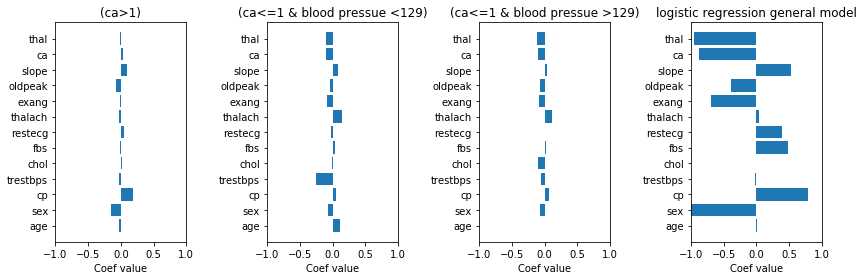

In [87]:
rows = 1
cols = 4
coefs = [
    node_1_coef,
    node_2_coef,
    node_3_coef,
    lr.coef_.ravel()
]
titles = ['(ca>1)', '(ca<=1 & blood pressue <129)', '(ca<=1 & blood pressue >129)','logistic regression general model']
f, axs = plt.subplots(rows, cols, sharex='col', figsize=(12, 4))
for col in range(cols):
    pos = np.arange(len(coefs[col])) + .5
    axs[col].barh(pos, coefs[col], align='center')
    axs[col].set_yticks(pos)
    axs[col].set_yticklabels(np.array(training_columns))
    axs[col].set_xlabel('Coef value')
    axs[col].set_title(titles[col])
    axs[col].set_xlim(-1,1)

f.tight_layout()

**For each region specified by the tree a different linear equation is specified where the probability output is thresholded at 0.5 , for people who have more than prominant vein after applying blue dye (ca>1)more weight is given to the type of chest pain and the sex of the patient ,  having less than 1 prominant vein and low blood pressure , less weight is given to the blood pressure and more to whether the patient achieve high rate of heart beats when tested by stress test**

**Over all each linear model had different coefficients for each variable**